In [88]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
plt.style.use("ggplot")

import imageio

from sklearn.cluster import KMeans

image shape: (4032, 3024, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

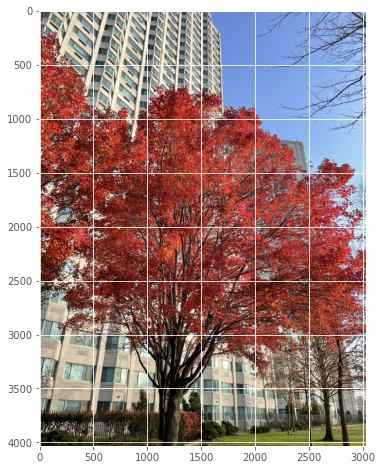

In [89]:
# Load the image and scale

image = imageio.imread('Tree.jpg')
print("image shape: " + str(image.shape))
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show

In [90]:
image_rows = image.shape[0]
image_cols = image.shape[1]

image_points = np.reshape(image, (image_rows * image_cols, 3))
print("image shape: " + str(image.shape))

image shape: (4032, 3024, 3)


In [91]:
kMeans = KMeans(n_clusters=32, random_state=1131145)
kMeans.fit(image_points)

KMeans(n_clusters=32, random_state=1131145)

In [92]:
centers = np.asarray(kMeans.cluster_centers_)

labels = np.asarray(kMeans.labels_)
labels = np.reshape(labels, (image_rows, image_cols))

In [93]:
image_compressed = np.zeros((image_rows, image_cols, 3), dtype=np.uint8)

for i in range(image_rows):
    for j in range(image_cols): 
            image_compressed[i, j, :] = centers[labels[i, j], :]

<function matplotlib.pyplot.show(close=None, block=None)>

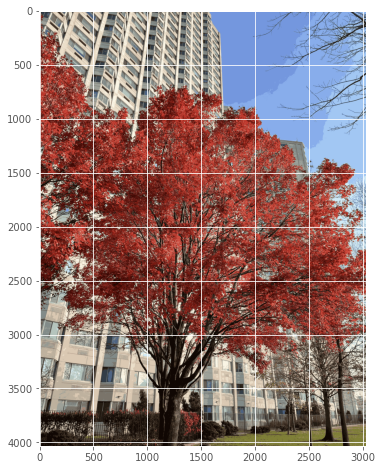

In [94]:
imageio.imsave('Tree-compressed-32.jpg', image_compressed)

plt.figure(figsize=(10,8))
plt.imshow(image_compressed)
plt.show